In [114]:
import numpy as np
import tensorflow as tf
import keras
import os
import cv2 as cv
import glob
from skimage import io
import skimage
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install keras_preprocessing

from numpy import expand_dims
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator
from skimage import filters, color, exposure, img_as_ubyte
from skimage.filters import prewitt

In [65]:
import os
data_pth = '/content/Screenshot 2024-12-06 130733.png'

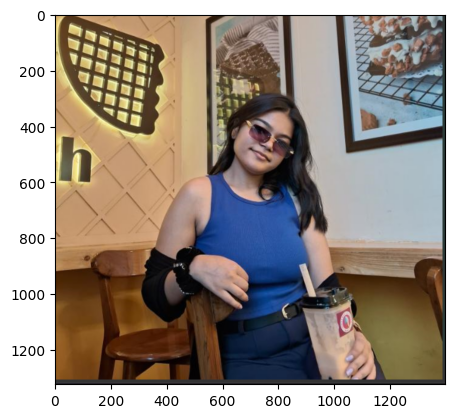

In [118]:

image = io.imread('/content/Screenshot 2024-12-06 130733.png')


i, (im1) = plt.subplots(1)
i.set_figwidth(12)
im1.imshow(image)

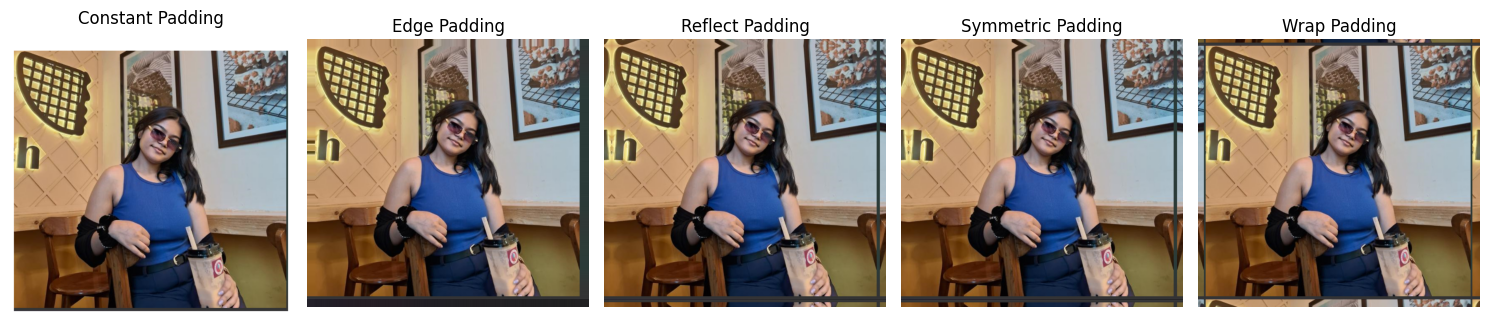

In [139]:
padded_image0 = np.pad(image, ((100, 20), (20, 20), (0, 0)), mode='constant', constant_values=255)  # Increased white padding
padded_image1 = np.pad(image, ((40, 40), (40, 40), (0, 0)), mode='edge')
padded_image2 = np.pad(image, ((40, 40), (40, 40), (0, 0)), mode='reflect')
padded_image3 = np.pad(image, ((40, 40), (40, 40), (0, 0)), mode='symmetric')
padded_image4 = np.pad(image, ((40, 40), (40, 40), (0, 0)), mode='wrap')

padded_images = [padded_image0, padded_image1, padded_image2, padded_image3, padded_image4]
titles = ['Constant', 'Edge', 'Reflect', 'Symmetric', 'Wrap']
fig, axes = plt.subplots(1, len(padded_images), figsize=(15, 5))

for i, img in enumerate(padded_images):
    axes[i].imshow(img)
    axes[i].set_title(f'{titles[i]} Padding')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


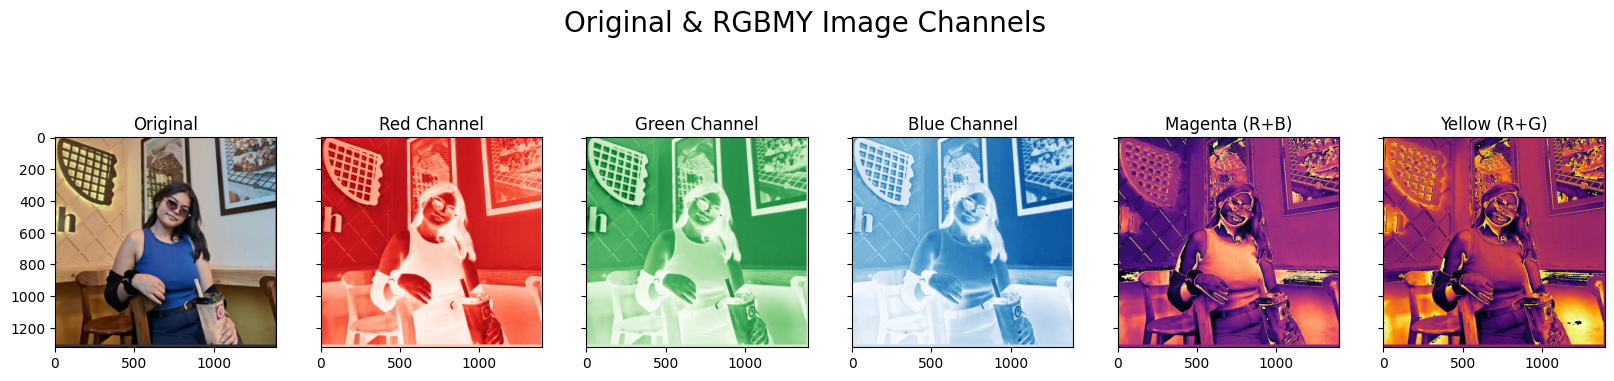

In [67]:
i, (im1, im2, im3, im4, im5, im6) = plt.subplots(1, 6, sharey=True)
i.set_figwidth()

im1.imshow(image)
im2.imshow(image[:, :, 0], cmap="Reds")  # Red
im3.imshow(image[:, :, 1], cmap="Greens")  # Green
im4.imshow(image[:, :, 2], cmap="Blues")  # Blue
im5.imshow(image[:, :, 0] + image[:, :, 2], cmap="magma")  # Magenta (R+B)
im6.imshow(image[:, :, 0] + image[:, :, 1], cmap="inferno")  # Yellow (R+G)

im1.set_title("Original")
im2.set_title("Red Channel")
im3.set_title("Green Channel")
im4.set_title("Blue Channel")
im5.set_title("Magenta (R+B)")
im6.set_title("Yellow (R+G)")

i.suptitle("Original & RGBMY Image Channels", fontsize=16)
plt.show()

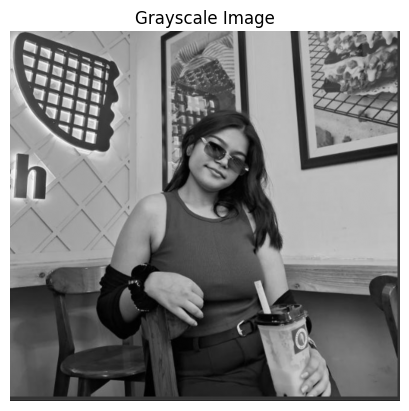

In [30]:
image = image[:, :, :3]
gray_img=skimage.color.rgb2gray(image)#works only for rgb so remove all other than those 3 channels
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

projecting image data pixels (intensity) to a predefined range (usually (0,1) or (-1, 1))
to apply the same algorithms over them.
This scales the pixel values so that the largest value becomes 1.
Now, all pixel values are in the range [0, 1]

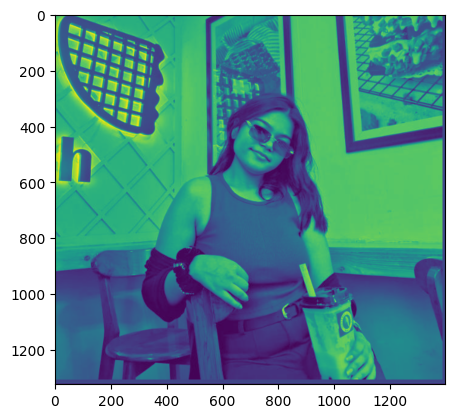

In [52]:
norm_image = (gray_img - np.min(gray_img)) / (np.max(gray_img) - np.min(gray_img))
plt.imshow(norm_image)

IMAGE AUGMENTATION
array of pixels,
dim inc to make batches,
img shift,
1 per batch
it is iterator

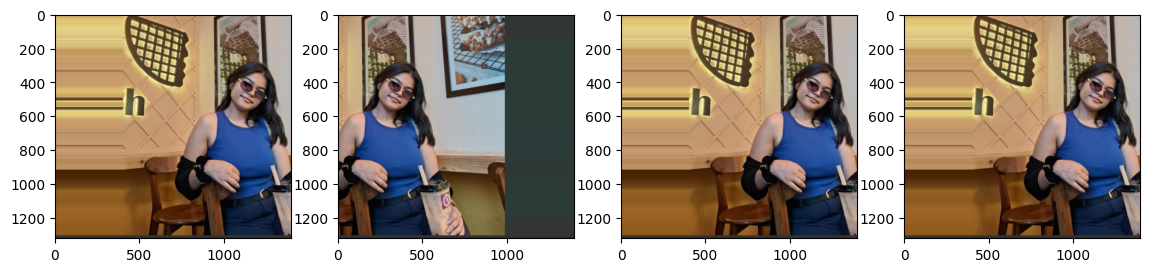

In [72]:
data = img_to_array(image)#array of pixels
samples = expand_dims(image, 0)
datagen = ImageDataGenerator(width_shift_range=[-400,400])#img shift
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=4, figsize=(14,14))

for i in range(4):

    images = next(it)[0].astype('uint8')
    im[i].imshow(images)

FLIPPING


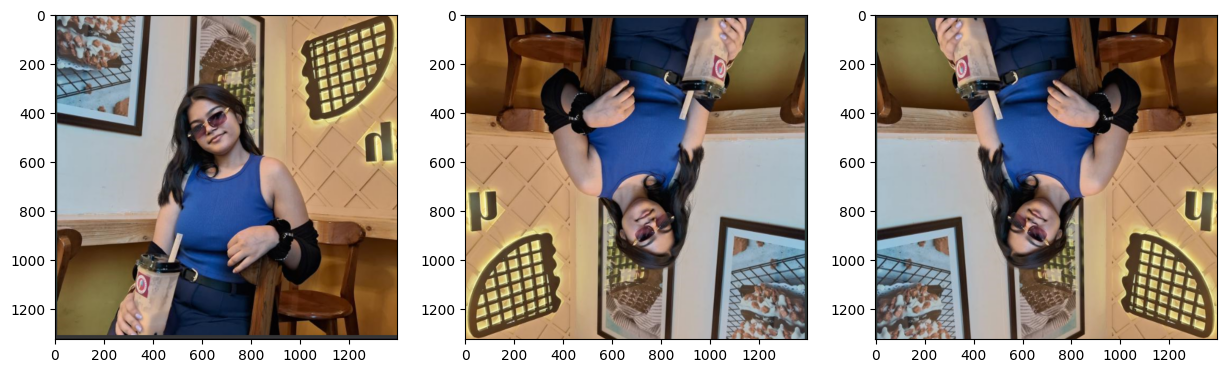

In [56]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    images = next(it)[0].astype('uint8')

    im[i].imshow(images)

ROTATION


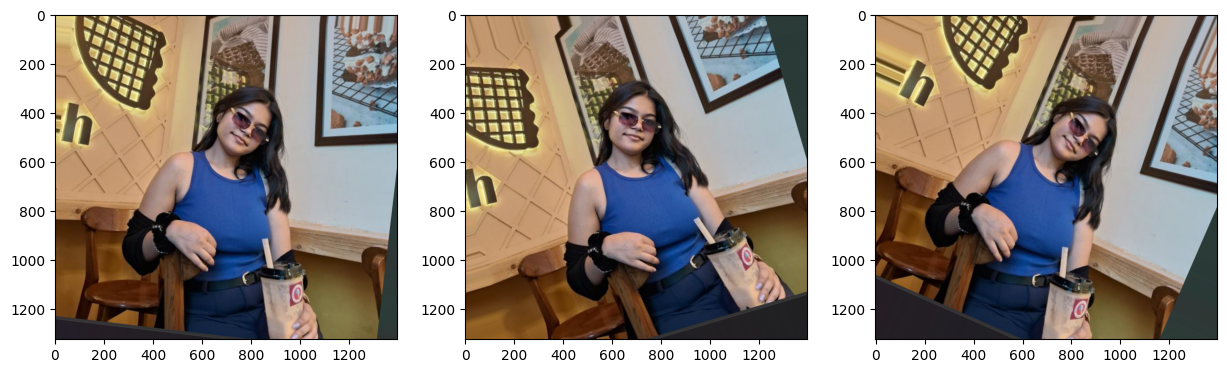

In [59]:
datagen = ImageDataGenerator(rotation_range=50, fill_mode='nearest')

it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
  images = next(it)[0].astype('uint8')

  im[i].imshow(images)

BRIGHTNESS

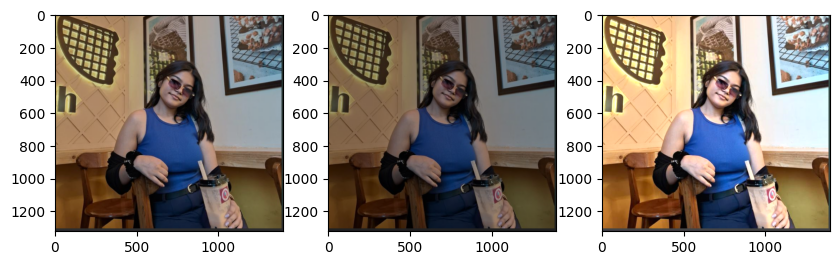

In [70]:
datagen=ImageDataGenerator(brightness_range=[0.5,2.0])
it =datagen.flow(samples,batch_size=1)
fig,im=plt.subplots(nrows=1,ncols=3,figsize=(10,10))
for i in range(3):
  images=next(it)[0].astype('uint8')
  im[i].imshow(images)

In [110]:
salt=io.imread('/content/salt and pep.png')
salt_gray=skimage.color.rgb2gray(salt)
Median= filters.median(salt)
plt.show()

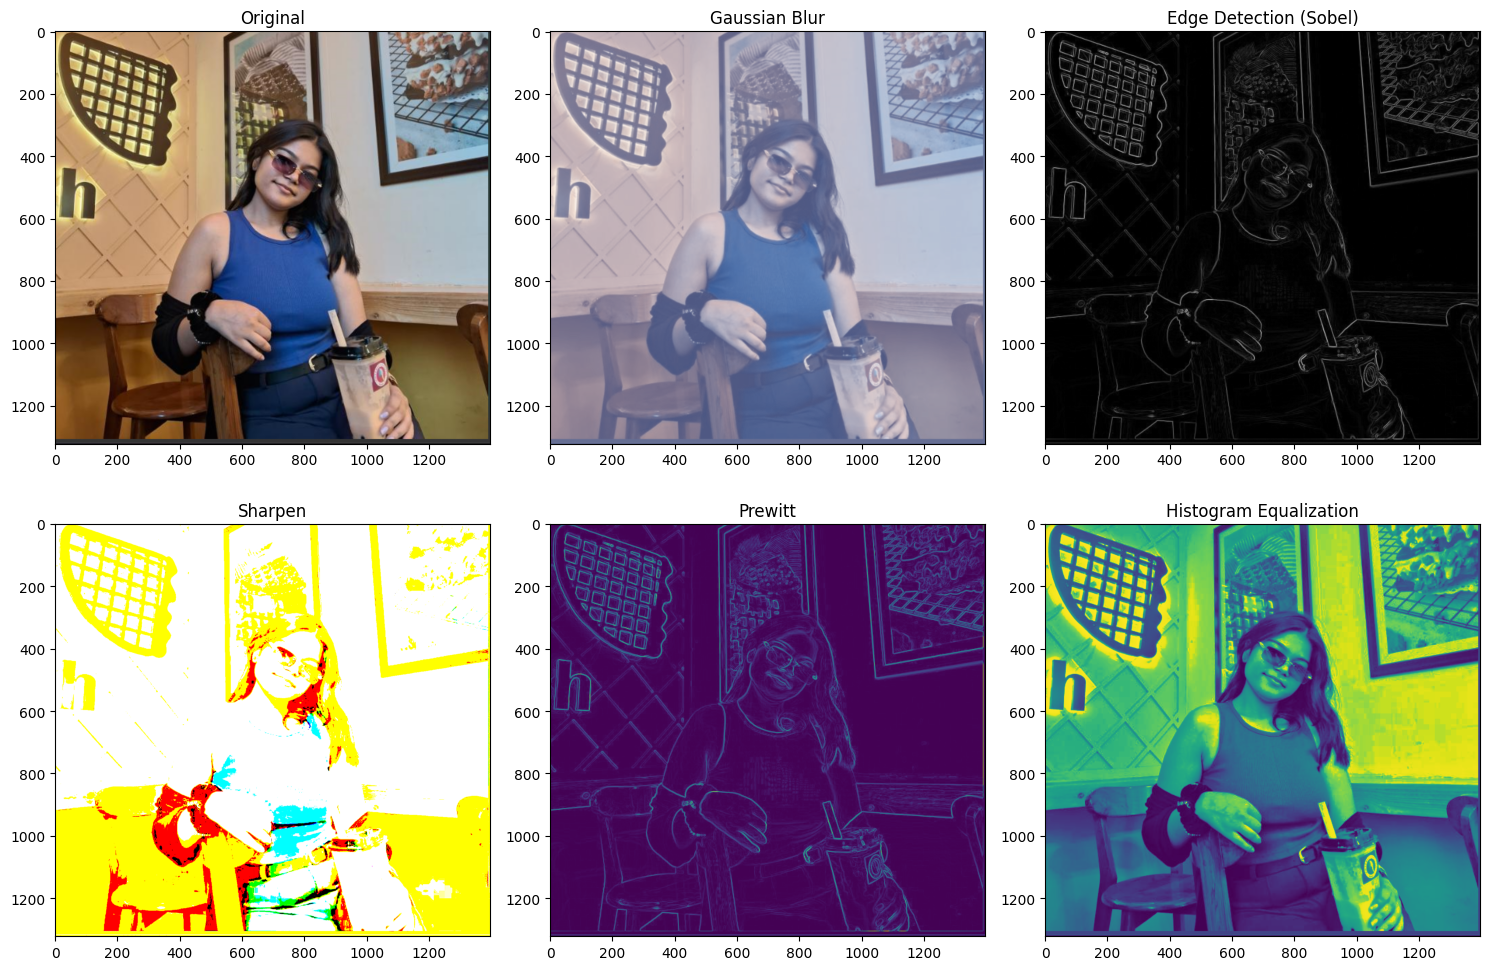

In [115]:
filters_dict = {
    'Original': image,
    'Gaussian Blur': filters.gaussian(image, sigma=1),
    'Edge Detection (Sobel)': filters.sobel(color.rgb2gray(data[:,:,:3])),
    'Sharpen': filters.unsharp_mask(data, radius=1, amount=1),
    'Prewitt': prewitt(color.rgb2gray(data[:,:,:3])),
    'Histogram Equalization': exposure.equalize_hist(color.rgb2gray(data[:,:,:3])),
}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (filter_name, filtered_image) in enumerate(filters_dict.items()):
    if filter_name == 'Original':
        axes[i].imshow(filtered_image)
    else:
        axes[i].imshow(filtered_image, cmap='gray' if filter_name == 'Edge Detection (Sobel)' else None)
    axes[i].set_title(filter_name)


plt.tight_layout()
plt.show()


Kernel and filter

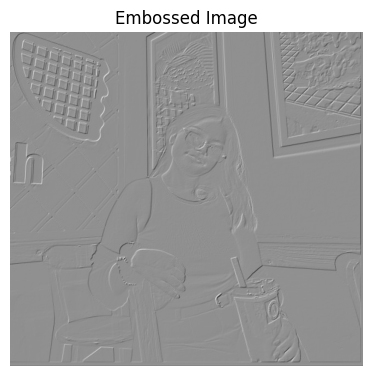

In [98]:
from skimage import color, filters, io
from scipy.ndimage import convolve

emboss_kernel = np.array([[0, 1, 0],
                          [1, 0, -1],
                          [0, -1, 0]])
embossed_img = convolve(gray_img, emboss_kernel)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.imshow(embossed_img, cmap='gray')
plt.axis('off')
plt.title('Embossed Image')

plt.show()

In [143]:
def display_image_channels_from_scratch(image):

    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]

    magenta_channel = red_channel + blue_channel
    yellow_channel = red_channel + green_channel
    red_img = np.zeros_like(image)
    red_img[:, :, 0] = red_channel

    green_img = np.zeros_like(image)
    green_img[:, :, 1] = green_channel

    blue_img = np.zeros_like(image)
    blue_img[:, :, 2] = blue_channel

    magenta_img = np.zeros_like(image)
    magenta_img[:, :, 0] = magenta_channel
    magenta_img[:, :, 2] = magenta_channel

    yellow_img = np.zeros_like(image)
    yellow_img[:, :, 0] = yellow_channel
    yellow_img[:, :, 1] = yellow_channel
    fig, axarr = plt.subplots(1, 6, figsize=(20, 10))

    axarr[0].imshow(image)
    axarr[0].set_title('Original')

    axarr[1].imshow(red_img)
    axarr[1].set_title('Red Channel')

    axarr[2].imshow(green_img)
    axarr[2].set_title('Green Channel')

    axarr[3].imshow(blue_img)
    axarr[3].set_title('Blue Channel')

    axarr[4].imshow(magenta_img)
    axarr[4].set_title('Magenta (R+B)')

    axarr[5].imshow(yellow_img)
    axarr[5].set_title('Yellow (R+G)')

    plt.suptitle('Original & RGBMY Image Channels', fontsize=16)

    for ax in axarr:
        ax.axis('off')

    plt.show()